In [72]:
#imports

import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

plt.figure(figsize=(55,8))

#read data from excel
sales_df_mast = pd.read_excel("Sample - Superstore.xls")

#set start and end date for analaysis - choosing rolling 1 month
end = sales_df_mast['Order Date'].max()
start = datetime(end.year, end.month-1, end.day)

#filtering only required data
sales_df = sales_df_mast[sales_df_mast['Order Date'] >= start] 
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
75,76,US-2020-118038,2020-12-09,2020-12-11,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,...,77041.0,Central,OFF-BI-10004182,Office Supplies,Binders,Economy Binders,1.248,3,0.8,-1.9344
76,77,US-2020-118038,2020-12-09,2020-12-11,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,...,77041.0,Central,FUR-FU-10000260,Furniture,Furnishings,"6"" Cubicle Wall Clock, Black",9.708,3,0.6,-5.8248
77,78,US-2020-118038,2020-12-09,2020-12-11,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,...,77041.0,Central,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",27.240,3,0.2,2.7240
110,111,CA-2020-146780,2020-12-25,2020-12-30,Standard Class,CV-12805,Cynthia Voltz,Corporate,United States,New York City,...,10035.0,East,FUR-FU-10001934,Furniture,Furnishings,Magnifier Swing Arm Lamp,41.960,2,0.0,10.9096
144,145,CA-2020-155376,2020-12-22,2020-12-27,Standard Class,SG-20080,Sandra Glassco,Consumer,United States,Independence,...,64055.0,Central,OFF-AP-10001058,Office Supplies,Appliances,Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...,839.430,3,0.0,218.2518


<Figure size 3960x576 with 0 Axes>

In [73]:
# Q1: Show Sales, Profit, Profit per Order, Sales per Customer, Avg. Discount & Total Quantity
print(" Sales: %f \n Profit: %f\n Profit per Order: %f \n Sales per Customer: %f \n \
Avg. Discount: %f \n Total Quantity: %f" % (sales_df['Sales'].sum(), sales_df['Profit'].sum(),
                                            sales_df['Profit'].sum()/sales_df['Order ID'].count(),
                                            sales_df['Sales'].sum()/sales_df['Customer ID'].count(),
                                            sales_df['Discount'].sum()/sales_df['Discount'].count(),
                                            sales_df['Quantity'].count()))

 Sales: 90474.600800 
 Profit: 8532.868000
 Profit per Order: 17.888612 
 Sales per Customer: 189.674216 
 Avg. Discount: 0.146164 
 Total Quantity: 477.000000


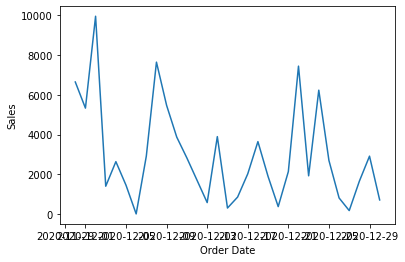

In [86]:
# Q2: Show daily sales
q2 = sns.lineplot(x='Order Date', y='Sales', data = sales_df, estimator = np.sum, ci = None)


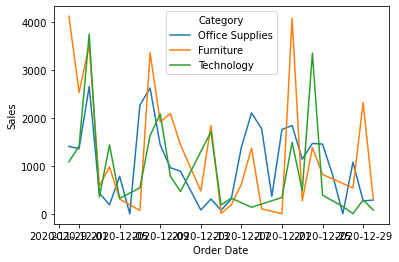

In [87]:
# Q3: Show daily sales by Category
q2 = sns.lineplot(x='Order Date', y='Sales', data = sales_df, estimator = np.sum, hue='Category', ci = None)
